# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [5]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import math

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [6]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

600

In [7]:
#tiny_list = cities[0:5]

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [8]:
# basic url
url = "https://api.openweathermap.org/data/2.5/weather?"

# # set city_data, units,
city_data = []
units = "imperial"

# # Start the call counter 
city_index =1
# set_index=1


for city in cities:

    try: 
        query_url = url + "appid=" + weather_api_key + "&units="+ units + "&q=" + city
        response = requests.get(query_url).json() 
        city_data.append(response)
        print(f"Processing Record {city_index}| {city}")
        city_index= city_index + 1
        # Wait a second in loop to not over exceed rate limit of API
        time.sleep(1.01)
        # If no record found "skip" to next call
    except:
        print("City not found. Skipping...")
    pass

Processing Record 1| barrow
Processing Record 2| verkhneuralsk
Processing Record 3| itapirapua
Processing Record 4| schleiden
Processing Record 5| rimouski
Processing Record 6| torbay
Processing Record 7| pilot butte
Processing Record 8| cherskiy
Processing Record 9| illoqqortoormiut
Processing Record 10| te anau
Processing Record 11| ponta do sol
Processing Record 12| olgod
Processing Record 13| ushuaia
Processing Record 14| klaksvik
Processing Record 15| albany
Processing Record 16| busselton
Processing Record 17| mar del plata
Processing Record 18| punta arenas
Processing Record 19| qaanaaq
Processing Record 20| panama city
Processing Record 21| cape town
Processing Record 22| butaritari
Processing Record 23| hobart
Processing Record 24| georgetown
Processing Record 25| bredasdorp
Processing Record 26| sentyabrskiy
Processing Record 27| bethel
Processing Record 28| burica
Processing Record 29| bitung
Processing Record 30| jinzhou
Processing Record 31| puro
Processing Record 32| riki

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [9]:
# write the json file into a text file
with open("json.txt", "w") as output:
    output.write(str(city_data))

In [10]:
city = []
cloudiness = []
country = []
date = []
humidity = []
lat = []
lng = []
max_temp = []
wind_speed = []

num_city = len(city_data)
for i in range(num_city):
    try:
        city.append(city_data[i]["name"])
        cloudiness.append(city_data[i]["clouds"]["all"])
        country.append(city_data[i]["sys"]["country"])
        date.append(city_data[i]["dt"])
        humidity.append(city_data[i]["main"]["humidity"])
        lat.append(city_data[i]["coord"]["lat"])
        lng.append(city_data[i]["coord"]["lon"])
        max_temp.append(city_data[i]["main"]["temp_max"])
        wind_speed.append(city_data[i]["wind"]["speed"])
    except:
        continue 
        
city_data_df = pd.DataFrame(list(zip(city, cloudiness, country,
                                     date, humidity, lat, lng, 
                                     max_temp, wind_speed)), 
                            columns = ['City', 'Cloudiness', 'Country', 'Date', 'Humidity', 'Lat', 'Lng', 'Max Temp', 'Wind Speed'])
# display the dataframe
city_data_df

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Barrow,1,US,1587271816,71,71.29,-156.79,6.80,8.05
1,Verkhneural'sk,20,RU,1587272322,46,53.88,59.21,41.00,8.95
2,Itapirapuã,86,BR,1587272324,85,-15.82,-50.61,69.30,3.29
3,Schleiden,32,DE,1587272325,100,50.53,6.48,46.40,2.24
4,Rimouski,5,CA,1587272326,40,48.45,-68.52,33.80,17.22
...,...,...,...,...,...,...,...,...,...
535,Tanout,4,NE,1587272884,14,14.97,8.89,78.28,7.94
536,San Cristobal,45,VE,1587273060,60,7.77,-72.22,65.93,0.89
537,Belaya Gora,23,RU,1587273061,91,68.53,146.42,10.67,9.13
538,Hargeisa,98,SO,1587273062,49,9.56,44.06,73.56,7.27


In [11]:
city_data_df.count()

City          540
Cloudiness    540
Country       540
Date          540
Humidity      540
Lat           540
Lng           540
Max Temp      540
Wind Speed    540
dtype: int64

In [12]:
# save the dataframe into a csv
city_data_df.to_csv("citydata.csv", index=False, header=True)

In [13]:
# change the Date into regular
from datetime import datetime
ts = int("1567634051")
converted = set([datetime.utcfromtimestamp(int(ts)).strftime('%m/%d/%Y') for ts in date])
weather_date = max(converted)
weather_date

'04/19/2020'

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

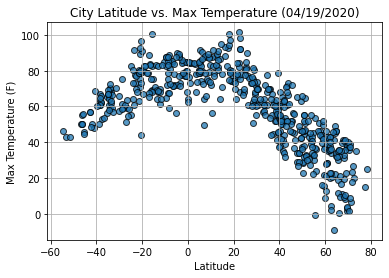

In [14]:
plt.scatter(city_data_df['Lat'], city_data_df['Max Temp'], alpha=0.75, marker='o', edgecolors='black')
plt.title(f"City Latitude vs. Max Temperature ({weather_date})")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid()
plt.savefig('lat_vs_temp.png')
plt.show()

#### Latitude vs. Humidity Plot

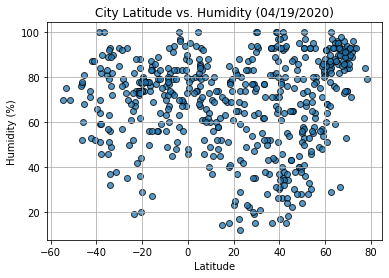

In [15]:
plt.scatter(city_data_df['Lat'], city_data_df['Humidity'], alpha=0.75, marker='o', edgecolors='black')
plt.title(f"City Latitude vs. Humidity ({weather_date})")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid()
plt.savefig('lat_vs_hum.png')
plt.show()

#### Latitude vs. Cloudiness Plot

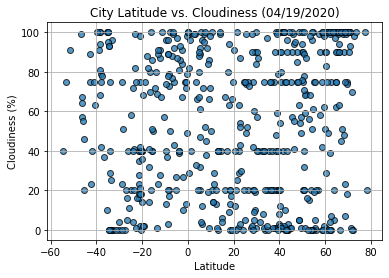

In [16]:
plt.scatter(city_data_df['Lat'], city_data_df['Cloudiness'], alpha=0.75, marker='o', edgecolors='black')
plt.title(f"City Latitude vs. Cloudiness ({weather_date})")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid()
plt.savefig('lat_vs_cloudiness.png')
plt.show()

#### Latitude vs. Wind Speed Plot

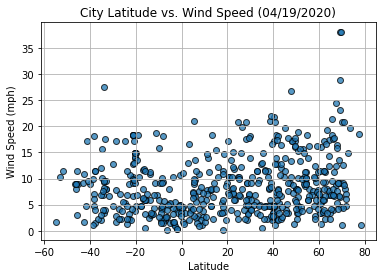

In [17]:
plt.scatter(city_data_df['Lat'], city_data_df['Wind Speed'], alpha=0.75, marker='o', edgecolors='black')
plt.title(f"City Latitude vs. Wind Speed ({weather_date})")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.grid()
plt.savefig('lat_vs_windspeed.png')
plt.show()

## Linear Regression

In [18]:
# OPTIONAL: Create a function to create Linear Regression plots


In [19]:
# Create Northern and Southern Hemisphere DataFrames
NH=city_data_df.loc[city_data_df["Lat"]>= 0]
SH=city_data_df.loc[city_data_df["Lat"] < 0]
#NH.head()
#SH.info()  170
#NH.info() 375
#SH.head()

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: -0.8595218887711227


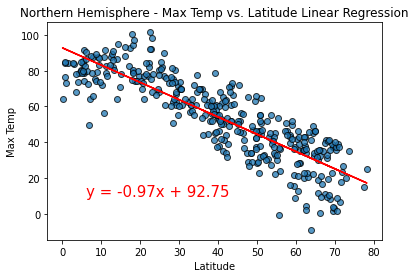

In [20]:
plt.scatter(NH['Lat'], NH['Max Temp'], alpha=0.75, marker='o', edgecolors='black')
plt.title("Northern Hemisphere - Max Temp vs. Latitude Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Max Temp")
#plt.savefig('lat_vs_windspeed.png')
x_values=NH['Lat']
y_values=NH['Max Temp']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_values,regress_values,"r-")

plt.annotate(line_eq,(6,10),fontsize=15,color="red")
print(f"The r-squared is: {rvalue}")
#plt.savefig('Northern Hemisphere-Max Temp_vs_Latitude.png')
plt.show()

# Explanation:  
#The correlated relationship between Latitude and Maxt temp in Northern Hemisphere can be decribled by a linear regression model. 
#85% of the dependent variable (Maxt temp) can be predicted by the independent variable of Latitude in Northern Hemisphere. 
#The linear regression model is considered as a good fit.

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.6794877487598182


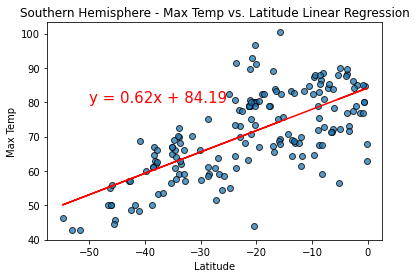

In [42]:
# scatter plot
plt.scatter(SH['Lat'], SH['Max Temp'], alpha=0.75, marker='o', edgecolors='black')
plt.title("Southern Hemisphere - Max Temp vs. Latitude Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Max Temp")
# linear regression and equation
x_value=SH['Lat']
y_value=SH['Max Temp']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_value, y_value)
regress_value = x_value * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_value,regress_value,"r-")
plt.annotate(line_eq,(-50,80),fontsize=15,color="red")
print(f"The r-squared is: {rvalue}")
#plt.savefig('Southern Hemisphere-Max Temp_vs_Latitude.png')
plt.show()

# why the equation does not show up?

# Explanation:  
#The correlated relationship between Latitude and Maxt temp in Sourthern Hemisphere can be decribled by a linear regression model. 
#About 67% of the dependent variable (Maxt temp) can be predicted by the independent variable of Latitude in Sourthern Hemisphere.
#This linear regression model is considered as a good fit.

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.21249734415107094


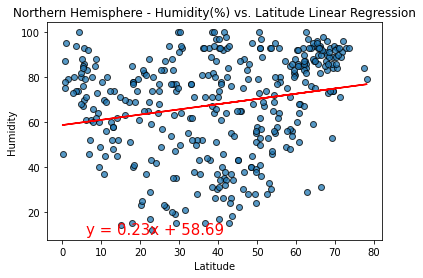

In [22]:
#scatter plot
plt.scatter(NH['Lat'], NH['Humidity'], alpha=0.75, marker='o', edgecolors='black')
plt.title("Northern Hemisphere - Humidity(%) vs. Latitude Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
# linear regression and equation
x_values=NH['Lat']
y_values=NH['Humidity']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")

print(f"The r-squared is: {rvalue}")
#plt.savefig('Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression.png')
plt.show()


# Explanation:  
#The correlated relationship between Latitude and Humidity in Northern Hemisphere can be decribled by a linear regression model. 
#Only 21% of the dependent variable (Humidity) can be predicted by the independent variable of Latitude in Northern Hemisphere.
#This linear regression model is not considered as a a good fit.

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.08276237017070529


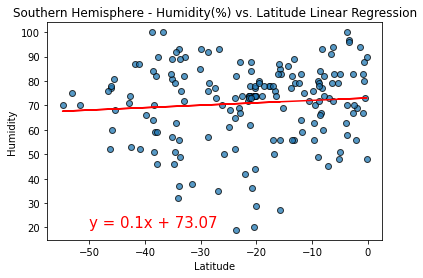

In [40]:
#scatter plot
plt.scatter(SH['Lat'], SH['Humidity'], alpha=0.75, marker='o', edgecolors='black')
plt.title("Southern Hemisphere - Humidity(%) vs. Latitude Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
# linear regression and equation
x_values=SH['Lat']
y_values=SH['Humidity']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-50,20),fontsize=15,color="red")

print(f"The r-squared is: {rvalue}")
#plt.savefig('Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression.png')
plt.show()

# Explanation:  
#The correlated relationship between Latitude and Humidity in Sourthern Hemisphere can be decribled by a linear regression model. 
#Only 8% of the dependent variable (Humidity) can be predicted by the independent variable of Latitude in Sourthern Hemisphere.
#This linear regression model is not considered as a a good fit.

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.15971281919161545


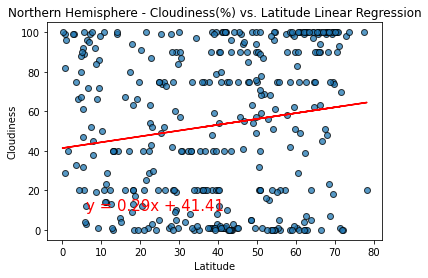

In [24]:
#scatter plot
plt.scatter(NH['Lat'], NH['Cloudiness'], alpha=0.75, marker='o', edgecolors='black')
plt.title("Northern Hemisphere - Cloudiness(%) vs. Latitude Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
# linear regression and equation
x_values=NH['Lat']
y_values=NH['Cloudiness']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")

print(f"The r-squared is: {rvalue}")
#plt.savefig('Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression.png')
plt.show()

# Explanation:  
#The correlated relationship between Latitude and Cloudiness in Northern Hemisphere can be decribled by a linear regression model. 
#Only 15% of the dependent variable (Cloudiness) can be predicted by the independent variable of Latitude in Northern Hemisphere.
#This linear regression model is not considered as a a good fit.

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.07925185063956842


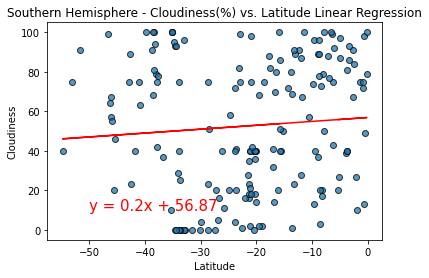

In [38]:
#scatter plot
plt.scatter(SH['Lat'], SH['Cloudiness'], alpha=0.75, marker='o', edgecolors='black')
plt.title("Southern Hemisphere - Cloudiness(%) vs. Latitude Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
# linear regression and equation
x_values=SH['Lat']
y_values=SH['Cloudiness']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-50,10),fontsize=15,color="red")

print(f"The r-squared is: {rvalue}")
#plt.savefig('Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression.png')
plt.show()

# Explanation:  
#The correlated relationship between Latitude and Cloudiness in Southern Hemisphere can be decribled by a linear regression model. 
#Only about 8% of the dependent variable (Cloudiness) can be predicted by the independent variable of Latitude in Southern Hemisphere.
#This linear regression model is not considered as a a good fit.

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.20944112383240954


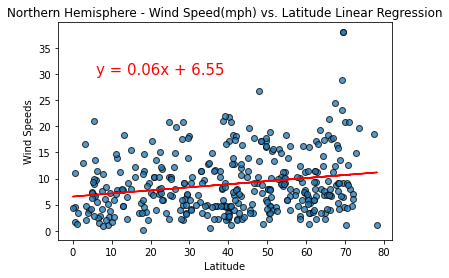

In [44]:
#scatter plot
plt.scatter(NH['Lat'], NH['Wind Speed'], alpha=0.75, marker='o', edgecolors='black')
plt.title("Northern Hemisphere - Wind Speed(mph) vs. Latitude Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Wind Speeds")
# linear regression and equation
x_values=NH['Lat']
y_values=NH['Wind Speed']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,30),fontsize=15,color="red")

print(f"The r-squared is: {rvalue}")
#plt.savefig('Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression.png')
plt.show()

# Explanation:  
#The correlated relationship between Latitude and Wind Speed in Northern Hemisphere can be decribled by a linear regression model. 
#Only 20% of the dependent variable (Wind Speed) can be predicted by the independent variable of Latitude in Northern Hemisphere.
#This linear regression model is not considered as a a good fit.

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: -0.23692333815097172


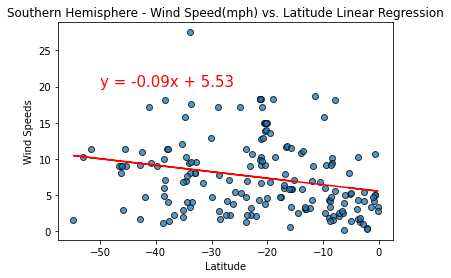

In [45]:
#scatter plot
plt.scatter(SH['Lat'], SH['Wind Speed'], alpha=0.75, marker='o', edgecolors='black')
plt.title("Southern Hemisphere - Wind Speed(mph) vs. Latitude Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Wind Speeds")
# linear regression and equation
x_values=SH['Lat']
y_values=SH['Wind Speed']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-50,20),fontsize=15,color="red")

print(f"The r-squared is: {rvalue}")
#plt.savefig('Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression.png')
plt.show()

# Explanation:  
#The correlated relationship between Latitude and Wind Speed in Southern Hemisphere can be decribled by a linear regression model. 
#Only 23% of the dependent variable (Wind Speed) can be predicted by the independent variable of Latitude in Southern Hemisphere.
#This linear regression model is not considered as a a good fit.

Observations:
[1]Max Temp correlates well with Latitude in both Northern and Southern Hemispheres which can be decribled by a linear regression model. 
[2]Humidity did not correlate well with latitude in both Northern and Southern Hemispheres, and could not be described by a linear regression model
[3]So are Cloudiness and Wind Speed, which can be predited by latitude in both Hemispheres through linear regeression models.